<a href="https://colab.research.google.com/github/Raneemalsalhi/Muffin--vs--chihuahua/blob/main/Muffin_vs_chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
train_dir = '/content/drive/MyDrive/Muffin vs chihuahua/archive/train'
test_dir = '/content/drive/MyDrive/Muffin vs chihuahua/archive/test'

In [6]:
import os
print(len(os.listdir('/content/drive/MyDrive/Muffin vs chihuahua/archive/train/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/Muffin vs chihuahua/archive/train/muffin')))
print(len(os.listdir('/content/drive/MyDrive/Muffin vs chihuahua/archive/test/chihuahua')))
print(len(os.listdir('/content/drive/MyDrive/Muffin vs chihuahua/archive/test/muffin')))

2579
2184
640
544


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 3812 images belonging to 2 classes.
Found 951 images belonging to 2 classes.


In [8]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 976s 8s/step - accuracy: 0.5736 - loss: 0.8645 - val_accuracy: 0.8233 - val_loss: 0.4071
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 716s 6s/step - accuracy: 0.8099 - loss: 0.4216 - val_accuracy: 0.7750 - val_loss: 0.4588
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 682s 6s/step - accuracy: 0.8510 - loss: 0.3441 - val_accuracy: 0.8854 - val_loss: 0.2773
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 737s 6s/step - accuracy: 0.8771 - loss: 0.2988 - val_accuracy: 0.8665 - val_loss: 0.3109
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 680s 6s/step - accuracy: 0.9076 - loss: 0.2200 - val_accuracy: 0.9033 - val_loss: 0.2583
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 680s 6s/step - accuracy: 0.9508 - loss: 0.1317 - val_accuracy: 0.8759 - val_loss: 0.3761
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 685s 6s/step - accuracy: 0.9680 - loss: 0.0881 - val_accuracy: 0.8644 - val_loss: 0.5129
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 738s 6s/step - accuracy: 0.9446 - loss: 0.1497 - val_accuracy: 0.872

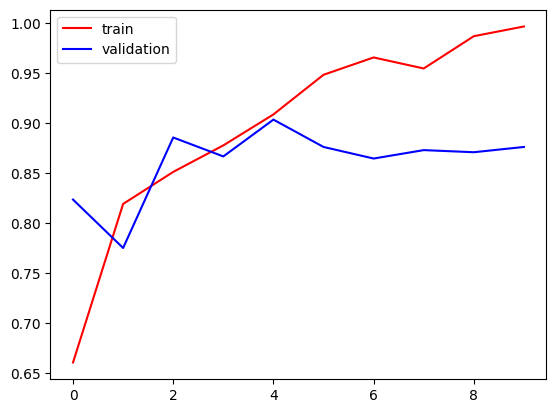

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

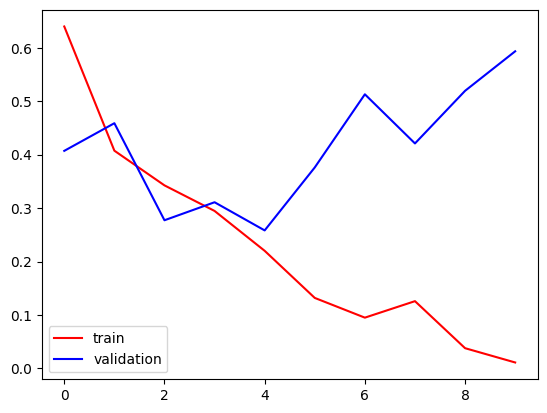

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1184 images belonging to 2 classes.


In [15]:
predictions = model.predict(test_data)
print(predictions)

37/37 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step
[[1.23633705e-01]
 [1.00000000e+00]
 [4.44078833e-05]
 ...
 [8.99145305e-01]
 [9.99944508e-01]
 [1.70968478e-13]]


In [16]:
len(predictions)

1184

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[313 327]
 [262 282]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.52       640
           1       0.46      0.52      0.49       544

    accuracy                           0.50      1184
   macro avg       0.50      0.50      0.50      1184
weighted avg       0.51      0.50      0.50      1184



Pre-trained model - Resnet

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [19]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1313s 11s/step - accuracy: 0.8297 - loss: 0.3926 - val_accuracy: 0.8517 - val_loss: 0.3345
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1283s 11s/step - accuracy: 0.8596 - loss: 0.3225 - val_accuracy: 0.8591 - val_loss: 0.3227
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1271s 11s/step - accuracy: 0.8622 - loss: 0.3265 - val_accuracy: 0.8475 - val_loss: 0.3680
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1278s 11s/step - accuracy: 0.8764 - loss: 0.3057 - val_accuracy: 0.8623 - val_loss: 0.3267
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1270s 11s/step - accuracy: 0.8428 - loss: 0.3636 - val_accuracy: 0.8633 - val_loss: 0.3478
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1265s 11s/step - accuracy: 0.8658 - loss: 0.3193 - val_accuracy: 0.8265 - val_loss: 0.4367
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1283s 11s/step - accuracy: 0.8641 - loss: 0.3210 - val_accuracy: 0.8570 - val_loss: 0.3234
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1277s 11s/step - accuracy: 0.8622 - loss: 0

In [22]:
predictions = resnet_model.predict(test_data)

37/37 ━━━━━━━━━━━━━━━━━━━━ 320s 9s/step


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[322 318]
 [276 268]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       640
           1       0.46      0.49      0.47       544

    accuracy                           0.50      1184
   macro avg       0.50      0.50      0.50      1184
weighted avg       0.50      0.50      0.50      1184



There is overfitting and hence applying Dropout techniques to handle overfitting

In [24]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 696s 6s/step - accuracy: 0.6310 - loss: 0.7713 - val_accuracy: 0.8023 - val_loss: 0.4104
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 724s 6s/step - accuracy: 0.8217 - loss: 0.4202 - val_accuracy: 0.8297 - val_loss: 0.4019
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 713s 6s/step - accuracy: 0.8683 - loss: 0.3189 - val_accuracy: 0.8570 - val_loss: 0.3229
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 687s 6s/step - accuracy: 0.9038 - loss: 0.2450 - val_accuracy: 0.9054 - val_loss: 0.2424
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 768s 6s/step - accuracy: 0.9415 - loss: 0.1591 - val_accuracy: 0.8686 - val_loss: 0.3789
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 715s 6s/step - accuracy: 0.9584 - loss: 0.1140 - val_accuracy: 0.8970 - val_loss: 0.3751
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 771s 6s/step - accuracy: 0.9810 - loss: 0.0516 - val_accuracy: 0.8707 - val_loss: 0.5016
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 685s 6s/step - accuracy: 0.9893 - loss: 0.0362 - val_accu

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1184 images belonging to 2 classes.


In [28]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step


In [29]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[372 268]
 [290 254]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       640
           1       0.49      0.47      0.48       544

    accuracy                           0.53      1184
   macro avg       0.52      0.52      0.52      1184
weighted avg       0.53      0.53      0.53      1184

